In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.datasets import cifar10
from keras import layers
from keras.utils import to_categorical
from keras.optimizers import Adam

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
train_images[0].shape

(32, 32, 3)

In [4]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
def label_array_to_labels_name(label_arr):
    image_index = {
        0: 'PLANE',
        1: 'AUTOMOBILE',
        2: 'BIRD',
        3: 'CAT',
        4: 'DEER',
        5: 'DOG',
        6: 'FROG',
        7: 'HORSE',
        8: 'SHIP',
        9: 'TRUCK'
    }
    
    return image_index[label_arr.argmax()]

This is: FROG


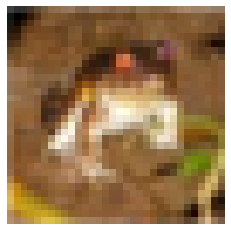

In [7]:
plt.imshow(train_images[0])
plt.axis('off')
print(f'This is: {label_array_to_labels_name(train_labels[0])}')

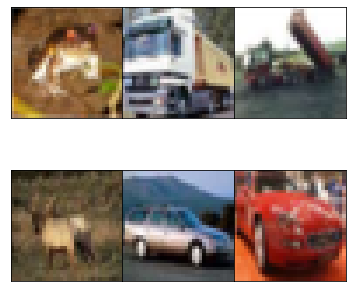

In [8]:
_, axes = plt.subplots(2, 3, figsize=(6, 6))
axes = axes.flatten()

for image, axe in zip(train_images, axes):
    axe.imshow(image)
    axe.set_xticks([])
    axe.set_yticks([])

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

## Build a model

In [10]:
model = Sequential([
    layers.Conv2D(
        filters=32, kernel_size=(3, 3),
        activation='relu', padding='same', input_shape=(32, 32, 3)
    ),
    layers.MaxPool2D(pool_size=(2, 2), strides=2),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [85]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
model.fit(x=train_images, y=train_labels, epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 172s 110ms/step - loss: 1.6305 - accuracy: 0.4014
Epoch 2/10
1563/1563 [==============================] - 156s 100ms/step - loss: 1.0077 - accuracy: 0.6423
Epoch 3/10
1563/1563 [==============================] - 145s 93ms/step - loss: 0.8332 - accuracy: 0.7075
Epoch 4/10
1563/1563 [==============================] - 148s 95ms/step - loss: 0.7276 - accuracy: 0.7458
Epoch 5/10
1563/1563 [==============================] - 142s 91ms/step - loss: 0.6429 - accuracy: 0.7760
Epoch 6/10
1563/1563 [==============================] - 146s 93ms/step - loss: 0.5667 - accuracy: 0.8023
Epoch 7/10
1563/1563 [==============================] - 162s 103ms/step - loss: 0.4934 - accuracy: 0.8269
Epoch 8/10
1563/1563 [==============================] - 161s 103ms/step - loss: 0.4290 - accuracy: 0.8501
Epoch 9/10
1563/1563 [==============================] - 164s 105ms/step - loss: 0.3588 - accuracy: 0.8739
Epoch 10/10
1563/1563 [===========================

In [87]:
model.evaluate(x=test_images, y=test_labels)

313/313 [==============================] - 14s 44ms/step - loss: 1.0090 - accuracy: 0.7185


[1.009033441543579, 0.718500018119812]

In [135]:
img = cv2.imread('images/plane.jpg')
img = cv2.resize(img, (32, 32)).astype('float32') / 255.0

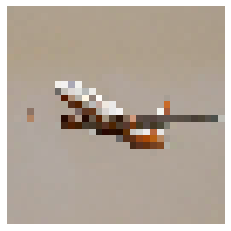

In [136]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [137]:
img = np.expand_dims(img, 0)
result = model.predict(x=img)

In [138]:
print(f'The result of prediction is: {label_array_to_labels_name(result)}')

The result of prediction is: PLANE
